# 1.1 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [1]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

2022-04-13 16:06:53.729348: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [2]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


label :  5


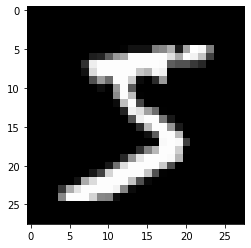

In [3]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

input(X)를 flatten, normalize

output(Y)를 onehot encoding

In [4]:
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)
print(Y_train_onehot)
print(X_train_flat.shape, Y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

https://keras.io/layers/core/#input

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

Activation : Activation Function을 정의, 문자열로 입력

https://keras.io/layers/core/#activation

In [5]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Functional Modeling

In [6]:
def linear_model_func(n_in, n_out):
    x = Input(shape=(n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)
    return model

### Sequential Modeling

In [7]:
def linear_model_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =n_out, input_shape=(n_in,), activation='softmax'))
    return model

In [8]:
model = linear_model_func(n_in, n_out)
model.summary()

2022-04-13 16:06:57.145361: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-13 16:06:57.146663: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-13 16:06:57.209097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.68GiB deviceMemoryBandwidth: 715.34GiB/s
2022-04-13 16:06:57.209150: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-13 16:06:57.212705: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-13 16:06:57.212801: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정

https://keras.io/models/model/

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## (4) 모델 학습시키기

In [10]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=128, epochs=20, validation_split=0.2)

2022-04-13 16:06:59.984561: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-13 16:07:00.002930: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz


Epoch 1/20


2022-04-13 16:07:00.225561: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 71/375 [====>.........................] - ETA: 0s - loss: 2.1076 - accuracy: 0.2851

2022-04-13 16:07:00.837690: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-04-13 16:07:00.839687: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


375/375 [==============================] - 2s 4ms/step - loss: 1.6876 - accuracy: 0.5345 - val_loss: 0.8821 - val_accuracy: 0.8247
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.8473 - accuracy: 0.8155 - val_loss: 0.6535 - val_accuracy: 0.8579
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.8431 - val_loss: 0.5599 - val_accuracy: 0.8683
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5813 - accuracy: 0.8594 - val_loss: 0.5077 - val_accuracy: 0.8767
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5316 - accuracy: 0.8678 - val_loss: 0.4738 - val_accuracy: 0.8834
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5019 - accuracy: 0.8710 - val_loss: 0.4500 - val_accuracy: 0.8875
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.8761 - val_loss: 0.4317 - val_accuracy: 0.8908
Epoch 8/20
375/37

## (5) 모델 평가하기

In [11]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.9068
loss : 0.3485, accruracy : 0.9068


## (6) 모델 사용하기

In [ ]:
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1]) #원래 Y_test[-1]로 되어있을것임/ 하지만 pred_y여야함
plt.imshow(X_test[-1], cmap='gray')

# 1.2 MNIST Classification with DNN (to do)
이번 실습에서는 keras로 DNN 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

## (2) Keras 모델링

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

Activation : Activation Function을 정의, 문자열로 입력
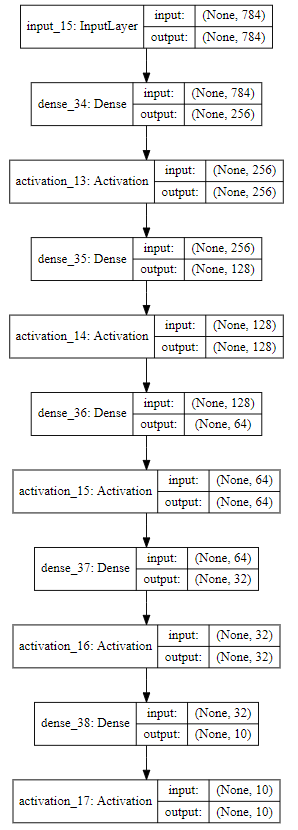

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

https://keras.io/layers/core/#activation

In [22]:
def DNN_func(n_in, n_out):
    inputs = Input(shape=(n_in,))
    x = Dense(256)(inputs)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dense(10)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = inputs, outputs = y)
    
    return model

def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units =256, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units =128, input_shape=(256,), activation='relu'))
    model.add(Dense(units =64, input_shape=(128,), activation='relu'))
    model.add(Dense(units =32, input_shape=(64,), activation='relu'))
    model.add(Dense(units =n_out, input_shape=(32,), activation='softmax'))
    return model

In [23]:
model = DNN_func(n_in, n_out)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_23 (Activation)   (None, 64)                0   

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

In [24]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

In [25]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=30, validation_split=0.3)

Epoch 1/30
165/165 [==============================] - 1s 6ms/step - loss: 0.8848 - accuracy: 0.7480 - val_loss: 0.1995 - val_accuracy: 0.9439
Epoch 2/30
165/165 [==============================] - 1s 5ms/step - loss: 0.1677 - accuracy: 0.9495 - val_loss: 0.1527 - val_accuracy: 0.9556
Epoch 3/30
165/165 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9676 - val_loss: 0.1367 - val_accuracy: 0.9603
Epoch 4/30
165/165 [==============================] - 1s 6ms/step - loss: 0.0699 - accuracy: 0.9796 - val_loss: 0.1182 - val_accuracy: 0.9646
Epoch 5/30
165/165 [==============================] - 1s 5ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.1129 - val_accuracy: 0.9684
Epoch 6/30
165/165 [==============================] - 1s 5ms/step - loss: 0.0485 - accuracy: 0.9857 - val_loss: 0.1061 - val_accuracy: 0.9719
Epoch 7/30
165/165 [==============================] - 1s 5ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.1346 - val_accuracy: 0.9629
Epoch 

## (5) 모델 평가하기

In [26]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9737
loss : 0.1342, accruracy : 0.9737


## (6) 모델 사용하기

predict label :  6


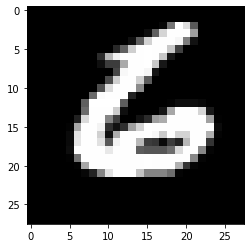

In [27]:
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('predict label : ',Y_test[-1]) #원래 Y_test[-1]로 되어있을것임/ 하지만 pred_y여야함
plt.imshow(X_test[-1], cmap='gray')

## 3.1 Simple CNN
이번 실습은 classifier 역할을 하는 DNN 앞에, feature extractor 역할을 하는 Covolution layer를 및 Maxplling layer를 덧붙여

CNN 모델을 만들고 학습시켜 볼 것이다.

In [29]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (1) 데이터셋

MNIST 데이터는 load했을 때 channel이 없기 때문에 channel을 추가하여 3차원 이미지로 바꿔주어야 함(batch차원 제외)

Tensorflow base에서는 (batch, image row, image column, image channel)으로 이미지를 학습

Teano base에서는 (batch, image channel, image row, image column)으로 이미지를 학습

backend.image_data_format()로 channel의 위치를 확인하고 reshape


In [30]:
from tensorflow.keras import backend
backend.image_data_format()

'channels_last'

In [31]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## (2) 모델링

<사용되는 Layer>

`Conv2D` : 이미지에 필터의 파라미터를 convolution 연산하여 다음 layer로 전달

https://keras.io/layers/convolutional/#conv2d

`MaxPooling2D` : 필터에 겹치는 값들 중 가장 큰 값만 다음 layer로 전달

https://keras.io/layers/pooling/#maxpooling2d

`BatchNormalization` : activation에 입력되기 전 데이터를 가우시안 분포로 정규화하여 학습 안정화

https://keras.io/layers/normalization/#batchnormalization

`Dropout` : 일부 뉴런을 drop하여 overfitting을 방지

https://keras.io/layers/core/#dropout
    
보통 batchnormalization, dropout은 동시에 사용하지 않음

`Flatten` : 다차원 tensor를 1차원 벡터로 변환

https://keras.io/layers/core/#flatten

In [35]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [36]:
def CNN(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_out, activation='softmax'))
    return model

def CNN_BN(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=n_in))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(n_out, activation='softmax'))
    return model

In [34]:
model=CNN_BN(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 7, 7, 32)          0

## (3) 모델의 학습과정 설정

optimizer에 문자열 대신에 파라미터를 수정한 optimizer를 입력할 수 있음

https://keras.io/optimizers/#adam

In [37]:
from tensorflow.keras.optimizers import Adam

In [38]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## (4) 모델 학습시키기

In [39]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20


2022-04-13 16:23:10.297369: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2022-04-13 16:23:11.941141: W tensorflow/stream_executor/gpu/asm_compiler.cc:98] *** WARNING *** You are using ptxas 9.1.108, which is older than 9.2.88. ptxas 9.x before 9.2.88 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You do not need to update to CUDA 9.2.88; cherry-picking the ptxas binary is sufficient.
2022-04-13 16:23:12.038715: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:12.038946: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perfo

2022-04-13 16:23:14.515306: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:14.611552: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:14.707399: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:14.808720: W tensorflow/stream_executor/gpu/

2022-04-13 16:23:17.125832: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:17.223713: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:17.318573: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:17.414469: W tensorflow/stream_executor/gpu/

2022-04-13 16:23:19.729704: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:19.830886: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:19.929582: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:20.026032: W tensorflow/stream_executor/gpu/

  1/375 [..............................] - ETA: 1:07:22 - loss: 2.8415 - accuracy: 0.0625

2022-04-13 16:23:20.314381: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:20.412736: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:20.505572: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'



367/375 [============================>.] - ETA: 0s - loss: 0.3559 - accuracy: 0.8982

2022-04-13 16:23:23.056174: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:23.154666: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:23.253652: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:23.352315: W tensorflow/stream_executor/gpu/

2022-04-13 16:23:25.688566: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:25.782269: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:25.881175: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:25.979406: W tensorflow/stream_executor/gpu/

375/375 [==============================] - 18s 18ms/step - loss: 0.3512 - accuracy: 0.8996 - val_loss: 0.0606 - val_accuracy: 0.9837
Epoch 2/20
 12/375 [..............................] - ETA: 1s - loss: 0.0484 - accuracy: 0.9889

2022-04-13 16:23:27.145437: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:23:27.241732: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'



375/375 [==============================] - 2s 6ms/step - loss: 0.0449 - accuracy: 0.9884 - val_loss: 0.0611 - val_accuracy: 0.9824
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0250 - accuracy: 0.9943 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.0479 - val_accuracy: 0.9856
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.0499 - val_accuracy: 0.9854
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0446 - val_accuracy: 0.9874
Epoch 8/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0472 - val_accuracy: 0.9881
Epoch 9/20
375/37

## (5) 모델 평가하기

In [40]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

69/79 [=========================>....] - ETA: 0s - loss: 0.0389 - accuracy: 0.9904

2022-04-13 16:24:11.183490: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:11.272621: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:11.373632: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:11.474084: W tensorflow/stream_executor/gpu/

2022-04-13 16:24:13.817837: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:13.916908: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:14.010876: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:14.110696: W tensorflow/stream_executor/gpu/

79/79 [==============================] - 5s 58ms/step - loss: 0.0392 - accuracy: 0.9902
loss : 0.0392, accruracy : 0.9902


2022-04-13 16:24:15.278571: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:24:15.377415: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'



## (6) 모델 사용하기

2022-04-13 16:32:10.246962: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:10.335551: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:10.435672: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:10.531692: W tensorflow/stream_executor/gpu/

2022-04-13 16:32:13.083379: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:13.181730: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:13.276448: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:32:13.375306: W tensorflow/stream_executor/gpu/

predict label : 6, real label : 6


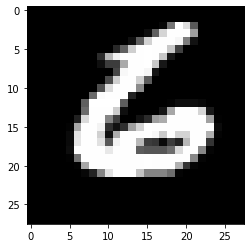

In [41]:
test_data = X_test[-1].reshape(1,28,28,1)
pred_y = model.predict(test_data).argmax()
real_y = Y_test[-1].argmax()
print('predict label : {}, real label : {}'.format(pred_y, real_y))
plt.imshow(X_test[-1].reshape(28,28), cmap='gray')

## 3.2 모델 합치기(feature extractor, ANN classifier)
convolution과 maxpooling layer로 구성된 feature extractor 모델과

fully connected layer로 구성된 ANN classifier 모델을 따로 정의하고

두 모델을 합쳐서 CNN 모델을 만듬

In [42]:
def conv_maxpool_layers(n_in):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def fc_layers(n_out):
    model = Sequential()
    model.add(Dense(units =128, input_shape=(1568,), activation='relu'))
    model.add(Dense(units =n_out, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def CNN_(n_in, n_out):
    #각 부분 모델
    feature_extractor=conv_maxpool_layers(n_in)
    feature_extractor.trainable=True
    ann_classifier = fc_layers(n_out)
    ann_classifier.trainable=True
    
    #두 모델을 합쳐 새로운 모델 정의
    x = Input(shape=n_in)
    feature = feature_extractor(x)
    y = ann_classifier(feature)
    model = Model(inputs = x, outputs = y)
    
    #model = Sequential()
    #model.add(feature_extractor)
    #model.add(ann_classifier)
    
    return model

In [43]:
model = CNN_(n_in, n_out)

In [44]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 1568)              4800      
_________________________________________________________________
sequential_2 (Sequential)    (None, 10)                202122    
Total params: 206,922
Trainable params: 206,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20


2022-04-13 16:35:32.647591: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:32.746987: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:32.847088: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:32.946750: W tensorflow/stream_executor/gpu/

 39/375 [==>...........................] - ETA: 1s - loss: 8.0294 - accuracy: 0.4904 

2022-04-13 16:35:34.125927: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'



365/375 [============================>.] - ETA: 0s - loss: 1.8431 - accuracy: 0.8173

2022-04-13 16:35:36.237952: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:36.335559: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:36.434117: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:36.534950: W tensorflow/stream_executor/gpu/

375/375 [==============================] - 5s 10ms/step - loss: 1.8051 - accuracy: 0.8201 - val_loss: 0.1075 - val_accuracy: 0.9679
Epoch 2/20
 13/375 [>.............................] - ETA: 1s - loss: 0.0612 - accuracy: 0.9820

2022-04-13 16:35:37.630880: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'

2022-04-13 16:35:37.730962: W tensorflow/stream_executor/gpu/asm_compiler.cc:235] Your CUDA software stack is old. We fallback to the NVIDIA driver for some compilation. Update your CUDA version to get the best performance. The ptxas error was: ptxas fatal   : Value 'sm_86' is not defined for option 'gpu-name'



375/375 [==============================] - 2s 5ms/step - loss: 0.0770 - accuracy: 0.9766 - val_loss: 0.1002 - val_accuracy: 0.9719
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0403 - accuracy: 0.9864 - val_loss: 0.0738 - val_accuracy: 0.9795
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0829 - val_accuracy: 0.9803
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0183 - accuracy: 0.9936 - val_loss: 0.0730 - val_accuracy: 0.9827
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0728 - val_accuracy: 0.9834
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0825 - val_accuracy: 0.9821
Epoch 9/20
375/37